# Check traffic conditions based on the borough entered by the user

# Traffic issues with respect to borough and day
# Traffic issues with respect to borough and period

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta,date
import calendar



In [2]:
dataframe = pd.read_csv('F:/Python_Project/1000linesfile.csv')
dataframe2 = dataframe.drop(['School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Location','Latitude','Longitude'],axis=1)


In [3]:

dataframe2['Created Date'] = pd.to_datetime(dataframe2['Created Date'])
dataframe2['Closed Date'] = pd.to_datetime(dataframe2['Closed Date'])

dataframe2['Time'] = dataframe2['Closed Date'] - dataframe2['Created Date']
dataframe2['weekday'] = dataframe2['Created Date'].dt.dayofweek

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataframe2['day_of_week'] = dataframe2['weekday'].apply(lambda x: days[x])

#get period of the day
times = list(range(8, 21, 4))
labels = ['morning', 'afternoon', 'evening', 'night']
periods = dict(zip(times, labels))
periods
#{8: 'morning', 16: 'evening', 12: 'afternoon', 20: 'night'}

def period(row):
    created_time = {'hour': row.Cd.hour, 'min': row.Cd.minute} # get hour, min of visit start
    for period_start, label in periods.items():
        period_end = period_start + 4
        if period_start <= created_time['hour'] < period_end:
            return label
        else:
            if 8>created_time['hour'] >= 0:
                return "early morning"
          

dataframe2['Cd'] = pd.to_datetime(dataframe['Created Date'])

dataframe2['period'] = dataframe2.apply(period, axis=1)

       


# Lets check the traffic related complaints w.r.t each borough

In [ ]:
# get the complaints related to noise with respect to borough
dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type','Descriptor', 'day_of_week', 'Borough','period']]
#.groupby(['Borough'])["Borough"].count().reset_index(name="count").sort_values(by='count', ascending=0)

dataframe3 = dataframe3[(dataframe3['Complaint Type'].str.contains("Traffic"))]
dfnoise= dataframe3.groupby(['Borough'])["Borough"].count().reset_index(name="count")

dfnoise.to_csv("F:/Python_Project/Analysis2/CSV/TrafficIssuesCount_borough.csv" ,  index = False)
dfnoise

In [ ]:
def plotdaytraffic(dfnoise):
    
    %matplotlib inline

    import matplotlib.pyplot as plt
    import seaborn as sns
       #dftrafficday = df
    plt.figure(figsize=(7,7))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2)
    sns.barplot(x="Borough", y="count", data=dfnoise)
    plt.xlabel("day_of_week")
    plt.ylabel("Count of complaints")
    plt.suptitle("Traffic complaints in each borough", y=1.05, fontsize=32)
    plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
    plt.xticks(rotation=60)

    plt.savefig("F:/Python_Project/Analysis2/Images/"+"traffic_issues_borough.png", bbox_inches='tight')

plotdaytraffic(dfnoise)

In [ ]:
def plotdaytraffic(df):
    
    %matplotlib inline

    import matplotlib.pyplot as plt
    import seaborn as sns
       #dftrafficday = df
    plt.figure(figsize=(12,12))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2)
    #sns.barplot(x="day_of_week", y="count", data=df)
    df.plot(x="day_of_week", y="count")
    plt.xlabel("day_of_week")
    plt.ylabel("Count of complaints")
    plt.suptitle("Traffic complaints in each borough wrt day-- " + borough_input , y=1.05, fontsize=32)
    plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
    plt.savefig("F:/Python_Project/Analysis2/Images/traffic_issues_day.png", bbox_inches='tight')



# Lets check the traffic pattern with respect to borough and day

In [ ]:

dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type','Descriptor', 'day_of_week', 'Borough','period']]
borough_input = input("Please enter the name of a borough to check traffic issues and its trend")

if borough_input == "":
    print("All boroughs are considered because no borough was entered")

    dataframe3 = dataframe3[(dataframe3['Complaint Type'].str.contains("Traffic"))]
    dftrafficday= dataframe3.groupby(['day_of_week','Borough'])["day_of_week"].count().reset_index(name="count")
    dftrafficday.to_csv("F:/Python_Project/Analysis2/CSV/day_allborough_count.csv" ,  index = False)
else:
    borough_input = borough_input.upper()
    dataframe3 = dataframe3[(dataframe3['Complaint Type'].str.contains("Traffic")) & (dataframe3['Borough'] == borough_input)]
    dftrafficday= dataframe3.groupby(['day_of_week'])["day_of_week"].count().reset_index(name="count")
    dftrafficday.to_csv("F:/Python_Project/Analysis2/CSV/day_"+borough_input+"_borough_count.csv" ,  index = False)
    plotdaytraffic(dftrafficday)
dftrafficday.reset_index()

    
dftrafficday

# Lets check the traffic pattern with respect to borough and period of the day

In [ ]:
def plotperiod_count(dftrafficperiod):
    %matplotlib inline

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(25,30))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=2)
    #sns.barplot(x="day_of_week", y="count", data=dfnoise)'
    dftrafficperiod.plot(x="period", y="count")
    plt.xlabel("day_of_week")
    plt.ylabel("Number of complaints")
    plt.suptitle("Traffic complaints in each borough wrt period of the day" + borough_input , y=1.05, fontsize=32)
    plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
    plt.savefig("F:/Python_Project/Analysis2/Images/"+"traffic_issues_period_borough_"+borough_input+".png", bbox_inches='tight')
    

In [15]:

# get the number of complaints with respect to period

dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type','Descriptor', 'day_of_week', 'Borough','period']]

print("Please enter early morning, morning, evening, afternoon or night")

borough_input1 = input("Please enter the name of a borough to check traffic issues and its trend")

period = input("Please enter the name of a period to check traffic issues and its trend")

print("You entered: ", period)

if (period == "") & (borough_input1 == ""):
    dataframe3 = dataframe3[(dataframe3['Complaint Type'].str.contains("Traffic"))]
    dftrafficperiod1= dataframe3.groupby(['period','Borough'])["period"].count().reset_index(name="count")
    dftrafficperiod1.to_csv("F:/Python_Project/Analysis2/CSV/period_all_borough.csv" ,  index = False)
    plotperiod_borough()

if period == "" or borough_input1 == "":
    print("Please enter borough and period")

else:
    borough_input1 = borough_input1.upper()
    period = period.lower()
    dftrafficperiod2 = dataframe3[(dataframe3['Complaint Type'].str.contains("Traffic")) & (dataframe3['Borough'] == borough_input1) & (dataframe3['period'].str.contains(period))]
    dftrafficperiod2.to_csv("F:/Python_Project/Analysis2/period_borough_count.csv" ,  index = False)
    
dftrafficperiod1.reset_index()
#dftrafficperiod.plot.bar(stacked=True);
    
dftrafficperiod1

Please enter early morning, morning, evening, afternoon or night
Please enter the name of a borough to check traffic issues and its trend
Please enter the name of a period to check traffic issues and its trend
You entered:  
Please enter borough and period


,period,Borough,count
0,afternoon,BROOKLYN,1
1,early morning,MANHATTAN,1
2,early morning,QUEENS,1
3,evening,MANHATTAN,1
4,evening,QUEENS,1
5,morning,BROOKLYN,2
6,night,MANHATTAN,2


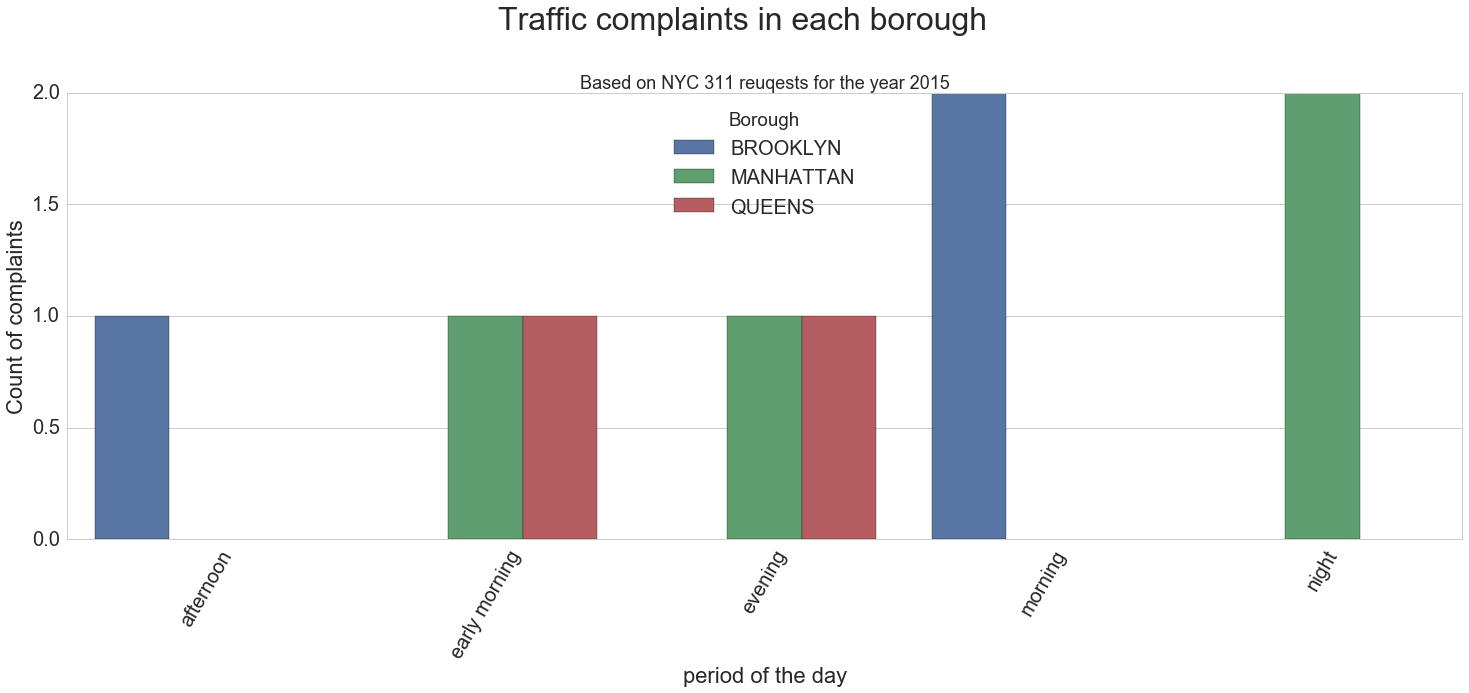

In [14]:
def plotperiod_borough():
    %matplotlib inline

    import matplotlib.pyplot as plt
    import seaborn as sns

plt.figure(figsize=(25,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="period", y="count", hue="Borough", data=dftrafficperiod1.sort_values(['period', 'count']))
plt.xlabel("period of the day")
plt.ylabel("Count of complaints")
plt.suptitle("Traffic complaints in each borough", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year 2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/Analysis2/Images/"+"traffic_issues_period_borough.png", bbox_inches='tight')

